# 📚 Importing Libraries 📚

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler ## Feature Scaling
from sklearn.preprocessing import OneHotEncoder ## categorical to numerical
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# ⏳ Loading the dataset ⏳</span>


In [13]:
df=pd.read_csv('data/LoanApprovalPrediction.csv')

# 🧠 Understanding of data 🧠

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
df.shape

(598, 13)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [18]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


# 🧹 Data Cleaning 🧹



*  Loan_ID doesn't contribute to the decision-making process but can be useful for record-keeping.
So we will drop this column


In [20]:
df.drop('Loan_ID',axis=1,inplace=True)

In [21]:
df.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

---

As now we can see that we have null values for -

1.   Dependents
2.   LoanAmount
3.   Loan_Amount_Term
4.   Credit_History


---
 For filling them firstly we will check that wether there is any outlier present or not.


*   if there is outlier present then for numerical column we will fill null values with median.
*    if there is no outlier present then for numerical column we will fill null values with mean.






<Axes: >

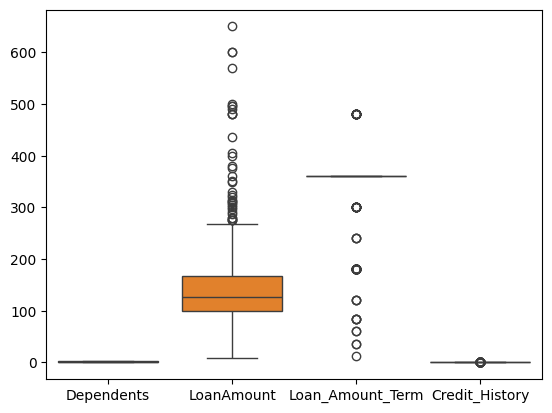

In [22]:
# box plot
sns.boxplot(data=df[['Dependents','LoanAmount','Loan_Amount_Term','Credit_History']])

---
Conclusions -


1.   LoanAmount , Loan_Amount_Term both are numerical columns has outliers present in it so we are going to fill null values with median.


---


2.   Dependents columns is ▶ The number of dependents could influence loan approval . We are going to fill this column null values with mode.


---


3. Credit_History this column gives you 0,1 as output. So we are going to fill null values for this column with mode.


---




In [23]:
# Handling Missing Values
df['LoanAmount']=df['LoanAmount'].fillna(df[df['LoanAmount'].notna()]['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df[df['Loan_Amount_Term'].notna()]['Loan_Amount_Term'].median())
df['Dependents']=df['Dependents'].fillna(df[df['Dependents'].notna()]['Dependents'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df[df['Credit_History'].notna()]['Credit_History'].mode()[0])

In [24]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
# Checking typo errors in categorical columns
for col in df.columns[df.dtypes=='object']:
  print('Name of Column',col)
  print(df[col].unique())
  print('\n','-'*60,'\n')


Name of Column Gender
['Male' 'Female']

 ------------------------------------------------------------ 

Name of Column Married
['No' 'Yes']

 ------------------------------------------------------------ 

Name of Column Education
['Graduate' 'Not Graduate']

 ------------------------------------------------------------ 

Name of Column Self_Employed
['No' 'Yes']

 ------------------------------------------------------------ 

Name of Column Property_Area
['Urban' 'Rural' 'Semiurban']

 ------------------------------------------------------------ 

Name of Column Loan_Status
['Y' 'N']

 ------------------------------------------------------------ 



In [26]:
# Checking Duplicate values
df.duplicated().sum()

0

# 📊 Data Visualization 📊

In [27]:
# Converting Credit History to categorical variable
df['Credit_History'] = df['Credit_History'].map({1:'Good',0:'Bad'})

Total no of people applied for loan by Gender
Gender
Male      487
Female    111
Name: count, dtype: int64


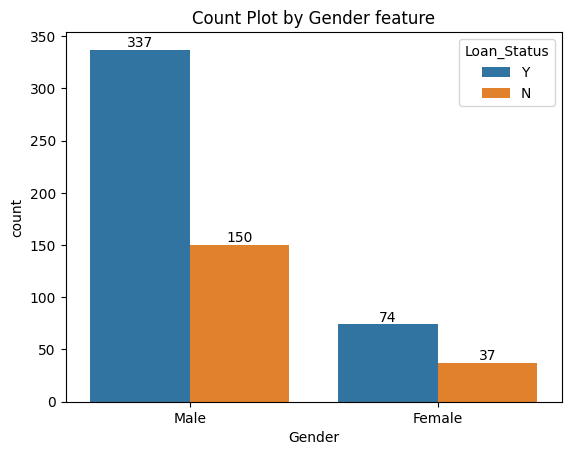

In [28]:
# Count plot for Gender
print ('Total no of people applied for loan by Gender')
print(df['Gender'].value_counts())

plt.title('Count Plot by Gender feature')
x=sns.countplot(x=df['Gender'],hue=df['Loan_Status'])
for bars in x.containers:
  x.bar_label(bars)

Total no of people applied for loan by Marital Status
Married
Yes    388
No     210
Name: count, dtype: int64


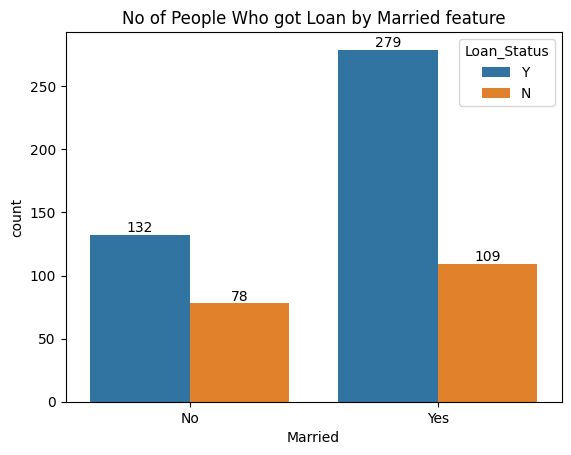

In [29]:
# Count plot for Married
print ('Total no of people applied for loan by Marital Status')
print(df['Married'].value_counts())

plt.title('No of People Who got Loan by Married feature')
x=sns.countplot(x=df['Married'],hue=df['Loan_Status'])
for bars in x.containers:
  x.bar_label(bars)

Total no of people applied for loan by Education feature
Education
Graduate        465
Not Graduate    133
Name: count, dtype: int64


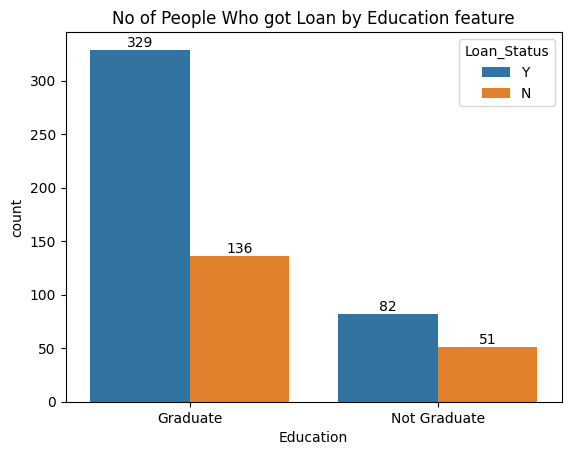

In [30]:
# Count plot for Education
print ('Total no of people applied for loan by Education feature')
print(df['Education'].value_counts())

plt.title('No of People Who got Loan by Education feature')
x=sns.countplot(x=df['Education'],hue=df['Loan_Status'])
for bars in x.containers:
  x.bar_label(bars)

Total no of people applied for loan by Credit_History feature
Credit_History
Good    512
Bad      86
Name: count, dtype: int64


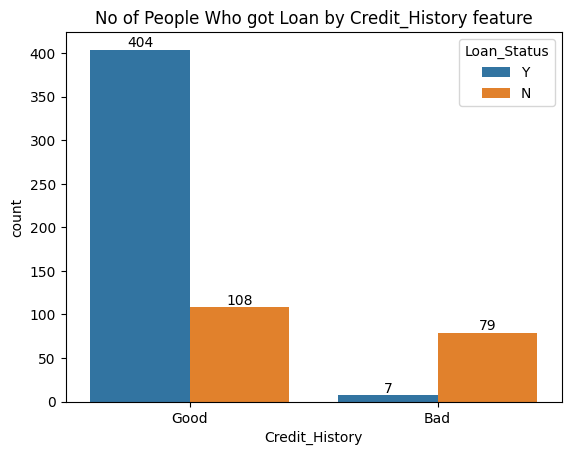

In [31]:
# Count plot for Credit_History
print ('Total no of people applied for loan by Credit_History feature')
print(df['Credit_History'].value_counts())

plt.title('No of People Who got Loan by Credit_History feature')
x=sns.countplot(x=df['Credit_History'],hue=df['Loan_Status'])
for bars in x.containers:
  x.bar_label(bars)

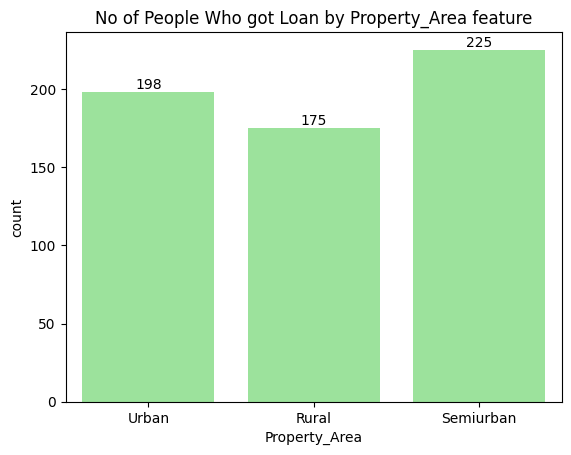

In [32]:
# Count plot for Property_Area

plt.title('No of People Who got Loan by Property_Area feature')
x=sns.countplot(x=df['Property_Area'],color='lightgreen')
for bars in x.containers:
  x.bar_label(bars)

# Insights Gain till now :
---


*   No of approval of loan for Male people are more as Compare to Female.
*   No of approval of loan for Married people are more as Compare to Unmarried.
*   No of approval of loan for Graduate people are more as Compare to Not Graduate People.
*   No of approval of loan for People has Good Credit_History are more as Compare to People who have Bad Credit_History.
* No of People applying for loan are mostly belonging to Semi Urban Area.





In [33]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

ValueError: could not convert string to float: 'Male'

**We can see that Applicant Income and Loan Amount are highly Correlated**

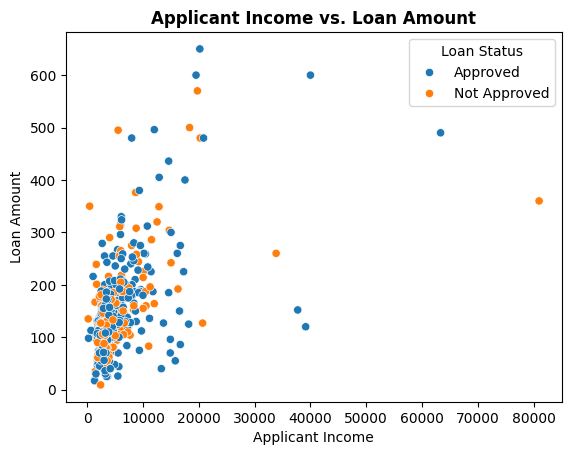

In [35]:
## Create Scatterplot
scatterplot = sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount", hue="Loan_Status")

## title and labels
plt.title("Applicant Income vs. Loan Amount", weight="bold")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")

## legend settings
scatterplot.legend(title="Loan Status")
legend_labels = ["Approved", "Not Approved"]  # Custom legend labels
for t, l in zip(scatterplot.get_legend().texts, legend_labels):
    t.set_text(l)

## show the plot
plt.show()

# ⚙️ Data Preprocessing ⚙️



---


**Splitting the data**


---



In [36]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [37]:
cat_columns=X.columns[X.dtypes=='object']
num_columns=X.columns[X.dtypes!='object']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=69)

In [39]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((478, 11), (478,), (120, 11), (120,))

---
**Pipline and Column Transformer**

---



In [40]:
## feature Engineering Automation
## Numerical Pipelines
num_pipeline=Pipeline(
    steps=[
        ('scaler',StandardScaler()) ],verbose=3

)

#categorical Pipeline
cat_pipeline=Pipeline(
                steps=[
                ('onehotencoder',OneHotEncoder()) ## Categorical features to numerical
                ],verbose=3

            )


In [41]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_columns),
    ('cat_pipeline',cat_pipeline,cat_columns)

])

preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())],
                                          verbose=3),
                                 Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())],
                                          verbose=3),
                                 Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History',
       'Property_Area'],
      dtype='object'))])

In [42]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s


In [43]:
X_train

array([[ 2.99542173e-01, -5.49659190e-01, -5.36430103e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.32226473e+00, -2.01921378e-01, -2.10384017e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-7.23180388e-01, -2.76558713e-01, -5.36430103e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.32226473e+00, -3.70187736e-01, -3.35097084e-04, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.23180388e-01, -5.33706171e-01, -5.36430103e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.32226473e+00, -4.90215205e-01, -1.70568774e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [44]:
X_test

array([[-7.23180388e-01, -2.54718271e-01,  6.87553750e-03, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.34498729e+00,  1.43787574e+01, -5.36430103e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.32226473e+00, -3.82912167e-01,  3.41505466e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 2.99542173e-01,  1.51416757e+00, -5.36430103e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-7.23180388e-01, -1.87677611e-01, -5.36430103e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.32226473e+00,  9.32094578e-02, -5.36430103e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [45]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=69)
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

In [46]:
def evaluate_model(X_train,X_test,y_train,y_test,models):
  score={}
  for i in range(len(models)):
    clf=list(models.values())[i]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    print(list(models.keys())[i])
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print(accuracy_score(y_test,pred))
    score[list(models.keys())[i]]=accuracy_score(y_test,pred)
    print("-"*40)
    print("\n")

  return score

In [47]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

In [48]:
X_train_resampled.shape,y_train_resampled.shape

((656, 18), (656,))

In [49]:
evaluate_model(X_train_resampled,X_test,y_train_resampled,y_test,models)

Logistic Regression
[[23 14]
 [11 72]]
              precision    recall  f1-score   support

           N       0.68      0.62      0.65        37
           Y       0.84      0.87      0.85        83

    accuracy                           0.79       120
   macro avg       0.76      0.74      0.75       120
weighted avg       0.79      0.79      0.79       120

0.7916666666666666
----------------------------------------


Decision Tree Classifier
[[26 11]
 [20 63]]
              precision    recall  f1-score   support

           N       0.57      0.70      0.63        37
           Y       0.85      0.76      0.80        83

    accuracy                           0.74       120
   macro avg       0.71      0.73      0.71       120
weighted avg       0.76      0.74      0.75       120

0.7416666666666667
----------------------------------------


Random Forest Classifier
[[21 16]
 [ 4 79]]
              precision    recall  f1-score   support

           N       0.84      0.57      0

{'Logistic Regression': 0.7916666666666666,
 'Decision Tree Classifier': 0.7416666666666667,
 'Random Forest Classifier': 0.8333333333333334}

In [50]:
df['Loan_Status'].value_counts()

Loan_Status
Y    411
N    187
Name: count, dtype: int64

In [51]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train_resampled,y_train_resampled)
pred=classifier.predict(X_test)

In [52]:
accuracy_score(y_test,pred)

0.7583333333333333